## Project: Assessing the spread and impact of covid-19 across the world.
### Proponent: The World Health Organization (WHO)
### Task: Exploratory Data Analysis
#### Date: 2021-10-22

## Approach
Before we begin the data analysis process, we need must ensure that our analysis is anchored on the project objectives. To do this, we will formulate questions based on the objectives to guide the exploratory analysis process.

### Project Objectives:
1. Track the trend of covid-19 infections/cases and deaths since the outbreak.
2. Identify countries and continents hit hardest by the pandemic.
3. Evaluate effectiveness of vaccines in controlling the spread of covid-19.

### Questions
**Objective 1**
1. What is the trend of new covid-19 cases and deaths in the world since the beginning of the outbreak? 
2. Are the number of new cases and new deaths decreasing or increasing?
3. What is the trend continent-wise?

**Objective 2**
1. Which country has the highest infection rate?
2. Which country has the highest death rate?
3. Which countries have above average infection and death rates?
4. Are there any countries with unusually high infection/death rates (outliers)?
6. Which continents have highest infection/ death rates?
8. What is the influence of continent/countries socio-economic position on infection and death rates?
9. Does the age of a country/continent's population have an effect on the number of infections and deaths?

**Objective 3**
#### Assumption:
Assumming that vaccine rollout had gained sufficient momentum in march 2021.

Keeping this assumption in mind. 

1. What was the trend of infections before and after vaccine rollout?
2. Which countries saw the highest reduction in average covid infections/deaths after vaccine rollout?

These questions are enough to get our analysis started. The next point of action is understand how to evaluate infection rate and mortality rate of a disease. 

In [1]:
# importing requisite libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as mysql
from mysql.connector import errorcode
from datetime import datetime


sns.set_theme(style='darkgrid')
%matplotlib notebook

In [2]:
# creating database connection
config = {
    'user': 'korir',
    'password': 'Wayne1966!',
    'host': 'localhost',
    'database': 'who_covid_19',
    'raise_on_warnings': True
}

conn = mysql.connect(**config)

In [3]:
# loading data from database

query = '''
        SELECT *
        FROM covid_19
        
        '''
covid_data = pd.read_sql(query, conn)

In [4]:
# checking that our data was loaded correctly
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118567 entries, 0 to 118566
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   entry_id                 118567 non-null  int64  
 1   iso_code                 118567 non-null  object 
 2   continent                118567 non-null  object 
 3   location                 118567 non-null  object 
 4   date_                    118567 non-null  object 
 5   total_cases              118567 non-null  int64  
 6   new_cases                118567 non-null  int64  
 7   total_deaths             118567 non-null  int64  
 8   new_deaths               118567 non-null  int64  
 9   population               118567 non-null  int64  
 10  median_age               118567 non-null  float64
 11  aged_65_older            118567 non-null  float64
 12  aged_70_older            118567 non-null  float64
 13  gdp_per_capita           118567 non-null  float64
 14  life

#### Note
The date column in our dataset was loaded as an objecty dtype, we need to change this to datetime.

In [5]:
# releasing database resources 
conn.close()

In [6]:
# changing dtype date column
covid_data['date_'] = covid_data['date_'].astype('Datetime64')

In [7]:
# inspect first few columns dataset
covid_data.head()

,entry_id,iso_code,continent,location,date_,total_cases,new_cases,total_deaths,new_deaths,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,life_expectancy,human_development_index
0,0,AFG,Asia,Afghanistan,2020-02-24,5,5,0,0,39835428,18.6,2.581,1.337,1803.99,64.83,0.511
1,1,AFG,Asia,Afghanistan,2020-02-25,5,0,0,0,39835428,18.6,2.581,1.337,1803.99,64.83,0.511
2,2,AFG,Asia,Afghanistan,2020-02-26,5,0,0,0,39835428,18.6,2.581,1.337,1803.99,64.83,0.511
3,3,AFG,Asia,Afghanistan,2020-02-27,5,0,0,0,39835428,18.6,2.581,1.337,1803.99,64.83,0.511
4,4,AFG,Asia,Afghanistan,2020-02-28,5,0,0,0,39835428,18.6,2.581,1.337,1803.99,64.83,0.511


In [8]:
# dropping redundant columns (they useful within the database context but not here)
covid_data.drop(columns=['entry_id', 'iso_code'], inplace=True)

## Analysis
### Objective 1
#### Answering Question 1 & 2: 
The objective is to understand the general trend of new covid-19 cases and deaths in the world since the start of the pandemic. Let's explore the how covid-19 cases and deaths change on a monthly basis across the world by looking at the avergage number of new cases and new deaths each month.

In [9]:
# grouping by month and getting average

month_avg_covid = covid_data.groupby(covid_data['date_'].dt.to_period('M'))[['new_cases', 'new_deaths']].mean()

# display first few rows

month_avg_covid.head()

,new_cases,new_deaths
date_,,
2020-01,32.422145,0.678201
2020-02,61.593137,2.225490
2020-03,184.804724,9.760758
2020-04,439.510506,35.874292
2020-05,505.266250,26.065867


In [10]:
# making the index more readable 
month_avg_covid.set_index(month_avg_covid.index.strftime('%b-%y'), inplace=True)

<IPython.core.display.Javascript object>


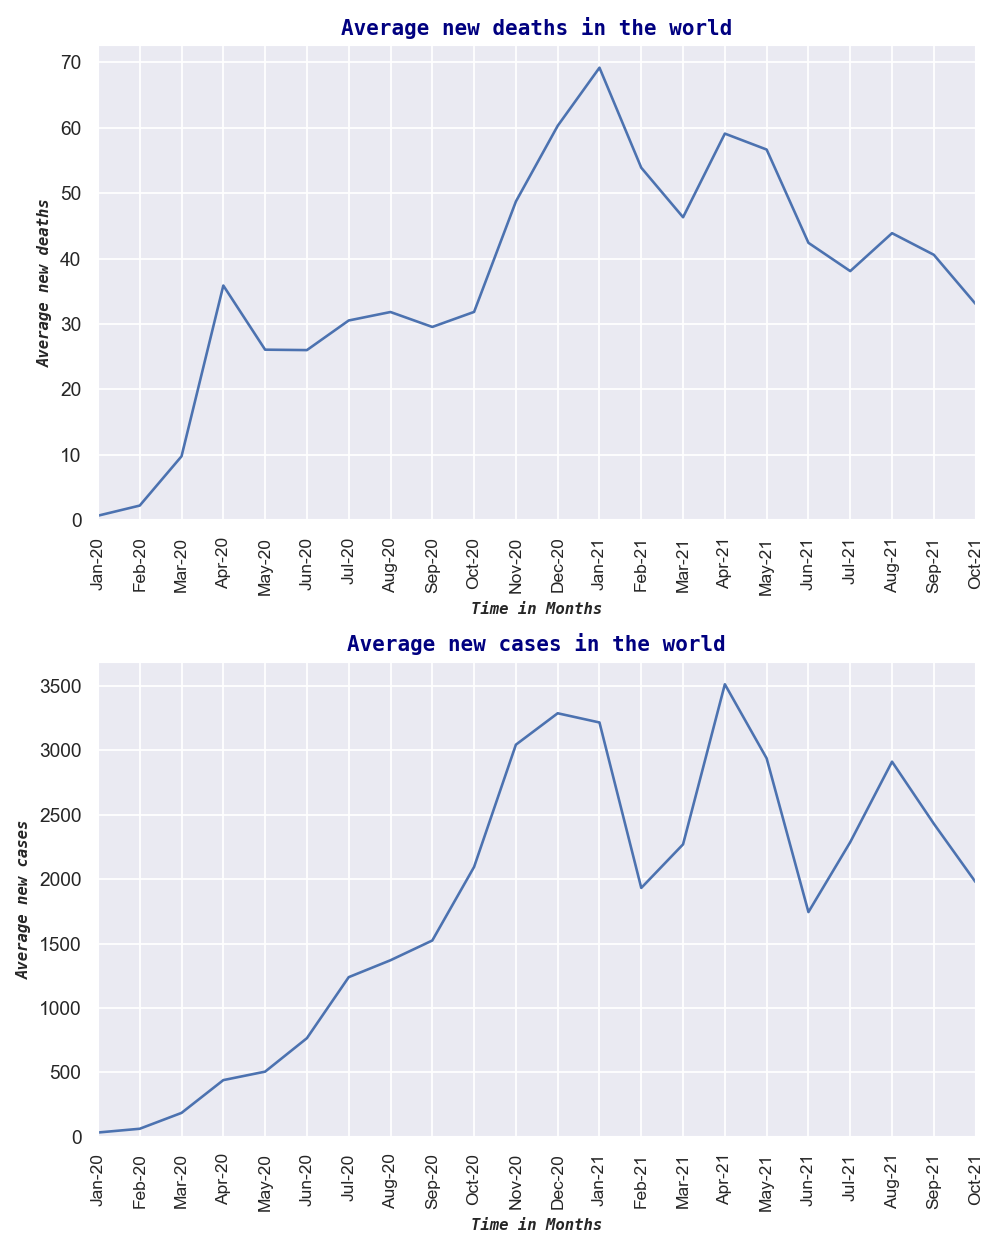

(0.0, 3688.507320278848)

In [11]:
# visualizing the trend of new covid_19 cases and deaths
fig, axes = plt.subplots(2,1, figsize=(8, 10), tight_layout=True, sharey=False)

# x axis limits
xlims = (month_avg_covid.index[0], month_avg_covid.index[-1])
# chart titles font properties 
title_font = {
    'color': 'navy',
    'fontfamily': 'Monospace',
    'fontstyle': 'normal',
    'fontsize': 12,
    'fontweight': 'bold'
}

# chart axis label font properties 

axis_label_font = {
    'fontfamily': 'Monospace',
    'fontstyle': 'italic',
    'fontsize': 9,
    'fontweight': 'bold'
}

# plot avg new_deaths vs time
sns.lineplot(x='date_', y='new_deaths', ax=axes[0], data=month_avg_covid)
axes[0].set_xlabel('Time in Months', **axis_label_font) # setting name of  ylabel
axes[0].set_ylabel('Average new deaths', **axis_label_font) # setting name of  ylabel
axes[0].set_title('Average new deaths in the world', **title_font) # setting Title
plt.setp(axes[0].get_xticklabels(), fontsize=10, rotation='vertical') # adjusting fontsize and inclination of xtick labels 
axes[0].set_xlim(xlims)  # setting x-lim
axes[0].set_ylim(bottom=0) # setting y-lim

# plot avg new_cases vs time
sns.lineplot(x='date_', y='new_cases', ax=axes[1], data=month_avg_covid) # plotting a line graph 
axes[1].set_xlabel('Time in Months', **axis_label_font) # setting name of  xlabel 
axes[1].set_ylabel('Average new cases', **axis_label_font) # setting name of  ylabel
axes[1].set_title('Average new cases in the world', **title_font)
plt.setp(axes[1].get_xticklabels(), fontsize=10, rotation='vertical') # adjusting fontsize and inclination of xtick labels 
axes[1].set_xlim(xlims) # setting x-lim
axes[1].set_ylim(bottom=0) # setting y-lim


#### Average new deaths are on the decline
As expected, we see that the number of new deaths increases over time. There was a sharp spike in the number of deaths between October 2020 and Jan 2021. After January 2021,  we observe a decline in the number of new deaths with the exception of April and July, which saw small spikes in number of deaths. 

#### Average new cases have periodic fluctuations
There was a steep steady increase in the number of new cases reported between the beginning of the pandemic and December 2020 where the number of cases began to drop off. Between January and October 2021, there have been periodic fluctuations with the number of new cases. The spike in the number of new cases in April is likely due to the Delta variant which many researches have concluded is more infectious than the Beta variant.

### Objective 1
#### Answering Question 3.
Previously we examined the worldwide trend of new cases and new deaths, here we want to look at the trend of cases and deaths on each continent. This might inform the WHO's covid-relief disbursement by prioritizing continents where number of deaths or cases are not declining.

In [12]:
# filtering data with continent and month

cont_month_avg_covid = covid_data.groupby(['continent', covid_data['date_'].dt.to_period('M')])[['new_cases', 'new_deaths']].mean() 

In [13]:
# inspection our resulting dataframe
cont_month_avg_covid.head()

new_cases  new_deaths
continent date_                          
Africa    2020-02    0.042254    0.000000
          2020-03    6.669746    0.230947
          2020-04   21.246134    0.923969
          2020-05   64.860409    1.557160
          2020-06  159.469136    3.656790

In [14]:
# transforming data into long-form for easy visualization
cont_month_avg_covid.reset_index(inplace=True)


In [15]:
# inspecting resulting dataframe 
cont_month_avg_covid.head()

,continent,date_,new_cases,new_deaths
0,Africa,2020-02,0.042254,0.000000
1,Africa,2020-03,6.669746,0.230947
2,Africa,2020-04,21.246134,0.923969
3,Africa,2020-05,64.860409,1.557160
4,Africa,2020-06,159.469136,3.656790


In [16]:
cont_month_avg_covid['date_'] = cont_month_avg_covid['date_'].dt.strftime('%Y-%m-%d')


In [17]:
cont_month_avg_covid['date_'] = cont_month_avg_covid['date_'].astype('Datetime64')

In [18]:
cont_month_avg_covid.head()

,continent,date_,new_cases,new_deaths
0,Africa,2020-02-29,0.042254,0.000000
1,Africa,2020-03-31,6.669746,0.230947
2,Africa,2020-04-30,21.246134,0.923969
3,Africa,2020-05-31,64.860409,1.557160
4,Africa,2020-06-30,159.469136,3.656790


<IPython.core.display.Javascript object>


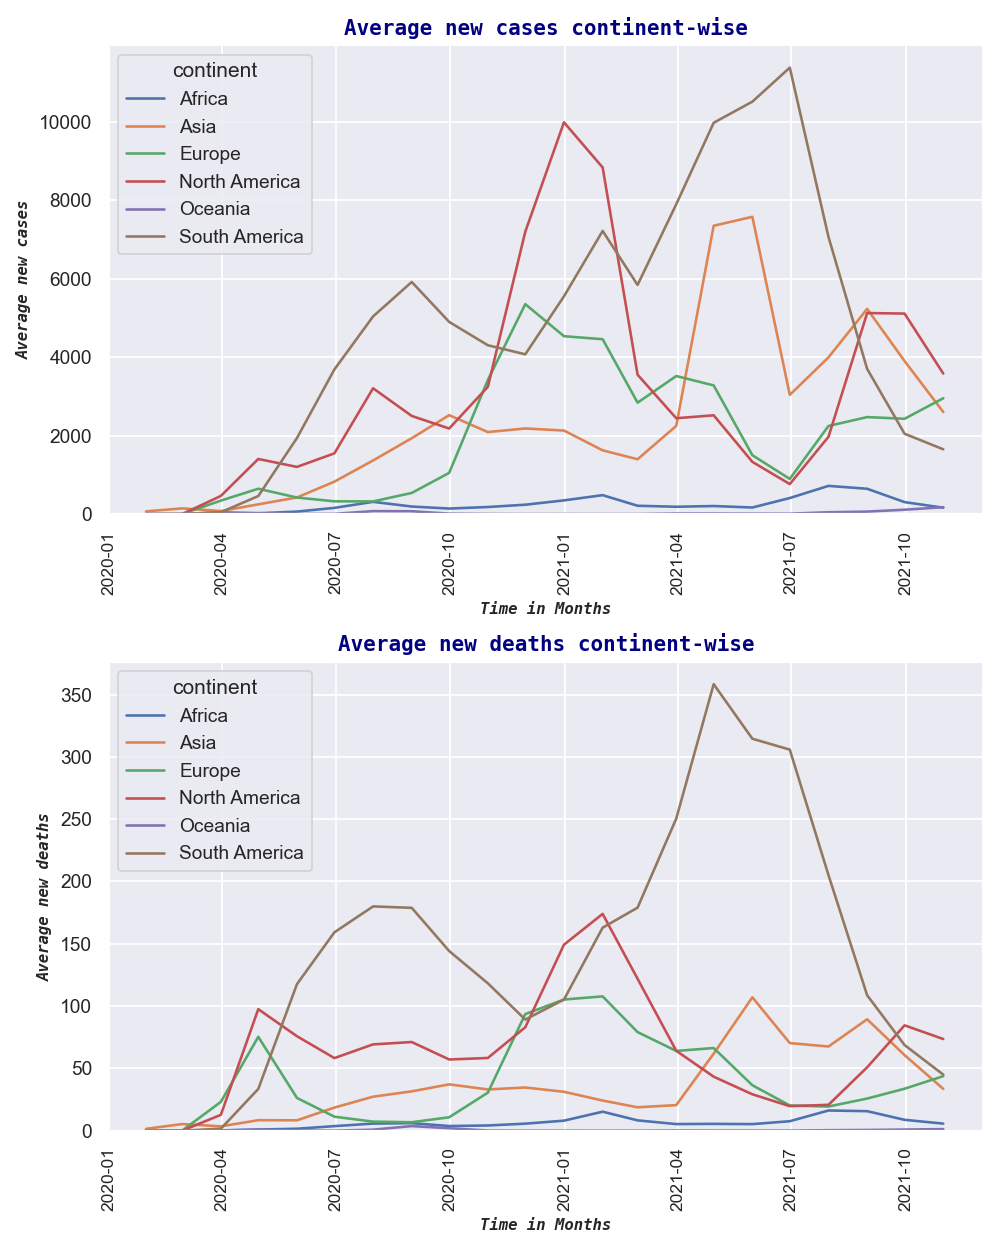

(18262.0, 18962.95)

In [19]:
# visualizing trend of new_cases and new deaths continent-wise

fig, axs = plt.subplots(2,1, figsize=(8, 10), tight_layout=True, sharey=False)

# x axis limits
xlims = pd.to_datetime('2020-01-01')
# chart titles font properties 
title_font = {
    'color': 'navy',
    'fontfamily': 'Monospace',
    'fontstyle': 'normal',
    'fontsize': 12,
    'fontweight': 'bold'
}

# chart axis label font properties 

axis_label_font = {
    'fontfamily': 'Monospace',
    'fontstyle': 'italic',
    'fontsize': 9,
    'fontweight': 'bold'
}

# charting average new cases per continent 
sns.lineplot(x='date_', y='new_cases', hue='continent', ax=axs[0], data=cont_month_avg_covid)
axs[0].set_xlabel('Time in Months', **axis_label_font) # setting name of  ylabel
axs[0].set_ylabel('Average new cases', **axis_label_font) # setting name of  ylabel
axs[0].set_title('Average new cases continent-wise', **title_font) # setting Title
plt.setp(axs[0].get_xticklabels(), fontsize=10, rotation='vertical') # adjusting fontsize and inclination of xtick labels 
axs[0].set_ylim(bottom=0) # setting y-lim
axs[0].set_xlim(left=xlims) # setting y-lim

# charting average new deaths per continent
sns.lineplot(x='date_', y='new_deaths', hue='continent', ax=axs[1], data=cont_month_avg_covid)
axs[1].set_xlabel('Time in Months', **axis_label_font) # setting name of  ylabel
axs[1].set_ylabel('Average new deaths', **axis_label_font) # setting name of  ylabel
axs[1].set_title('Average new deaths continent-wise', **title_font) # setting Title
plt.setp(axs[1].get_xticklabels(), fontsize=10, rotation='vertical') # adjusting fontsize and inclination of xtick labels 
axs[1].set_ylim(bottom=0) # setting y-lim
axs[1].set_xlim(left=xlims) # setting y-lim

## Trend Analysis

#### South America  
South America is the standout continent because of experienced high numbers of covid-19 cases averaging over 4000 cases a month for a year, peaking at over 11,000 in July 2021. The peak was quickly followed by a steep decline in the number of new cases. Analysis the number of new deaths for this continent, we observe that the number of new_death peaked at each time period where there were record number of new cases. Once the number of new cases began to decline, the number average new deaths also sharply reduce in July 2021. 

#### North America
In North America, the average number of new cases rose steadily between jan 2020 and November 2020. This was followed by a sharp rise in cases that peaked at 10,000 in January 2021. From January till July there was a constant decrease in the average number of covid-19 cases with lowest numbers at slightly under 1000 cases a month. The average number of new covid-19 deaths the number of death initially rose at sharply at the beginning of the pandemic, this was then followed by a plateau between May and November 2020. The average number of deaths  topped out in February 2021 and then fell to lowest in August 2021.

#### Europe
The avergage number of new cases and new deaths in Europe follow a similar pattern, the number of cases picked up in October 2020 and peaked between December 2020 and February 2021.

#### Asia
The average number of new case in Asia steadily rose from the start of the Pandemic in January 2020 until March 2021 where there was a spike in the number of cases with the highest average cases just over 7000 cases a month in June. This period was followed by a sudden decrease in the average number of new cases between June and July. The average number of new deaths also follows a similar pattern with new deaths peaking in June. 


#### Africa
For Africa, the average number of new cases and new deaths are quite low. There are two likely explanations for these the low numbers:
1. Under reporting of new_cases and new_deaths by governments
2. Lack of adequate covid-19 tests and testing facilities 

#### Ocenia 
The relative low population of Ocenia might explain the low numbers. Compared to the other continents which have large populations and thus likelihood of reporting high number of covid cases, Ocenia has just over 42 million inhabitants. 



## Objective 2:

#### Identify countries and continents hit hardest by the pandemic.  
1. Which country has the highest infection rate?
2. Which country has the highest death rate?
3. Which countries have above average infection and death rates?
4. Are there any countries with unusually high infection/death rates (outliers)?
5. What is the influence of continent/countries socio-economic position on infection and death rates?
6. Does the age of a country/continent's population have an effect on the number of infections and deaths?

### Principles of epidemiology 
The CDC defines morbidity has been defined as any departure, subjective or objective, from a state of physiological or psychological well-being. In practice, morbidity encompasses disease, injury, and disability. Measures of morbidity frequency characterize the number of persons in a population who become ill (incidence) or are ill at a given time (prevalence).

#### Measures of morbidity 
One measure of morbidity is of interest to use is **Incidence rate**,is the proportion of an initially disease-free population that develops disease, becomes injured, or dies during a specified (usually limited) period of time. Also often referred to as ***attack rate, risk**.

**Method for calculating incidence proportion (risk)**  

incidence   proportion = Number of new cases of disease during specified period / Size of population at start of period

Risk can be evaluated as percentage or expressed per a standard population ( 1 million, 1 hundred thousand, 10 thousand). 

#### Meaures of mortality
The CDC defines mortality rate as a measure of the frequency of occurrence of death in a defined population during a specified interval. Morbidity and mortality measures are often the same mathematically; it’s just a matter of what you choose to measure, illness or death. There are several measures of mortality, crude death rate, cause specific death rate, and age specific death rate. Here we are interested in deaths caused by covid-19 disease, thus the appropriate measure is cause specific mortality rate.

**Cause-specific mortality rate**
The cause-specific mortality rate is the mortality rate from a specified cause for a population. The numerator is the number of deaths attributed to a specific cause. The denominator is the size of the population at the midpoint of the time period. The fraction is usually expressed per 100,000.

*Source:* [CDC Website](https://www.cdc.gov/csels/dsepd/ss1978/index.html)


**Note**
For the sake of clarity, in our analysis the incidence rate will be referred to as *infection rate* and cause-specific mortality rate as simply *mortality rate*.

#### Time Period
As morbidity/infection rate has to be measured in a specific time period, we will take the analyze infection rate and death rate due covid-19 since the beginning of the pandemic. We will take the total number of infections/deaths divided by the total population of country to calculate the infection/death rate since the beginning of the pandemic. 

In [20]:
# aggregating new cases and new deaths data based on continent and country 

sum_cases_and_deaths = covid_data[['continent', 'location', 'new_cases', 'new_deaths']].groupby(['continent', 'location']).sum()

In [21]:
# inspection resulting dataframe

sum_cases_and_deaths.reset_index(inplace=True)
sum_cases_and_deaths

,continent,location,new_cases,new_deaths
0,Africa,Algeria,205199,5870
1,Africa,Angola,62789,1662
2,Africa,Benin,24560,161
3,Africa,Botswana,181856,2386
4,Africa,Burkina Faso,14686,203
...,...,...,...,...
219,South America,Paraguay,460322,16209
220,South America,Peru,2187368,199775
221,South America,Suriname,46313,1014
222,South America,Uruguay,390915,6067


In [22]:
# retrieving geographical (continent), age and socio-economic data for each country 
# the mean will not change age and socio-economic data so we can use grouping and the mean method
continent_location = covid_data.groupby(['continent', 'location']).mean() 
continent_location.reset_index(inplace=True)

# we drop the following columns which will contain averages which we do not need 
continent_location.drop(columns=['total_cases', 'new_cases', 'total_deaths', 'new_deaths'], inplace=True)
continent_location

,continent,location,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,life_expectancy,human_development_index
0,Africa,Algeria,44616626.0,29.1,6.211,3.857,13913.80,76.88,0.748
1,Africa,Angola,33933611.0,16.8,2.405,1.362,5819.50,61.15,0.581
2,Africa,Benin,12451031.0,18.8,3.244,1.942,2064.24,61.77,0.545
3,Africa,Botswana,2397240.0,25.8,3.941,2.242,15807.40,69.59,0.735
4,Africa,Burkina Faso,21497097.0,17.6,2.409,1.358,1703.10,61.58,0.452
...,...,...,...,...,...,...,...,...,...
219,South America,Paraguay,7219641.0,26.5,6.378,3.833,8827.01,74.25,0.728
220,South America,Peru,33359415.0,29.1,7.151,4.455,12236.70,76.74,0.777
221,South America,Suriname,591798.0,29.6,6.933,4.229,13767.10,71.68,0.738
222,South America,Uruguay,3485152.0,35.6,14.655,10.361,20551.40,77.91,0.817


In [23]:
# we merge the two datasets 

total_covid_data = pd.merge(sum_cases_and_deaths, continent_location, on=['continent', 'location'])

In [24]:
# inspecting our final dataframe
total_covid_data.head()

,continent,location,new_cases,new_deaths,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,life_expectancy,human_development_index
0,Africa,Algeria,205199,5870,44616626.0,29.1,6.211,3.857,13913.80,76.88,0.748
1,Africa,Angola,62789,1662,33933611.0,16.8,2.405,1.362,5819.50,61.15,0.581
2,Africa,Benin,24560,161,12451031.0,18.8,3.244,1.942,2064.24,61.77,0.545
3,Africa,Botswana,181856,2386,2397240.0,25.8,3.941,2.242,15807.40,69.59,0.735
4,Africa,Burkina Faso,14686,203,21497097.0,17.6,2.409,1.358,1703.10,61.58,0.452


#### Calculating the infection and mortality rate per 100,000.

In [25]:
# infection  rate per 100,000

total_covid_data['infection_rate'] = ((total_covid_data['new_cases']/total_covid_data['population'])* 100000).round(2)

In [26]:
# infection  rate per 100,000

total_covid_data['mortality_rate'] = ((total_covid_data['new_deaths']/total_covid_data['population'])* 100000).round(2)

In [27]:
# check our updated dataframe

total_covid_data.head()

,continent,location,new_cases,new_deaths,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,life_expectancy,human_development_index,infection_rate,mortality_rate
0,Africa,Algeria,205199,5870,44616626.0,29.1,6.211,3.857,13913.80,76.88,0.748,459.92,13.16
1,Africa,Angola,62789,1662,33933611.0,16.8,2.405,1.362,5819.50,61.15,0.581,185.03,4.90
2,Africa,Benin,24560,161,12451031.0,18.8,3.244,1.942,2064.24,61.77,0.545,197.25,1.29
3,Africa,Botswana,181856,2386,2397240.0,25.8,3.941,2.242,15807.40,69.59,0.735,7586.06,99.53
4,Africa,Burkina Faso,14686,203,21497097.0,17.6,2.409,1.358,1703.10,61.58,0.452,68.32,0.94


In [28]:
# Top ten countries with highest infection rates
total_covid_data.sort_values('infection_rate', ascending=False)[['continent', 'location', 'infection_rate', 'population']].head(10)

,continent,location,infection_rate,population
43,Africa,Seychelles,22094.83,98910.0
138,Europe,Montenegro,21877.36,628051.0
106,Europe,Andorra,19828.32,77354.0
64,Asia,Georgia,16527.40,3979773.0
146,Europe,San Marino,16092.33,34010.0
114,Europe,Czechia,15923.80,10724553.0
80,Asia,Maldives,15836.06,543620.0
58,Asia,Bahrain,15788.53,1748295.0
147,Europe,Serbia,15108.92,6908224.0
70,Asia,Israel,14964.17,8789776.0


In [29]:
# Top ten countries with highest death rates
total_covid_data.sort_values('mortality_rate', ascending=False)[['continent', 'location', 'mortality_rate', 'population']].head(10)

,continent,location,mortality_rate,population
220,South America,Peru,598.86,33359415.0
110,Europe,Bosnia and Herzegovina,340.44,3263459.0
140,Europe,North Macedonia,332.36,2082661.0
111,Europe,Bulgaria,322.34,6896655.0
138,Europe,Montenegro,321.63,628051.0
124,Europe,Hungary,315.04,9634162.0
114,Europe,Czechia,284.76,10724553.0
213,South America,Brazil,281.86,213993441.0
146,Europe,San Marino,267.57,34010.0
211,South America,Argentina,253.61,45605823.0


## Analysis of Infection and Mortality Rates

### Infection rates
#### Seychelles has the highest infection rate.
In seychelles, 22,094 every 100,000 residents has been diagnosed with covid-19. This indicates that almost everyone in the country has contracted the disease as the country had just under one hundred thousand inhabitants. 

#### Countries with high infection rates appear to have small populations:
In our top ten list of countries with highest infection rates, five have populations under one million. The others with the exception of Czechia have populations less than ten million. We will later explore if their exists relationship between the size of a country's population and the infection rate.

### Mortality rates
#### Peru had the highest death rate
Peru has the highest mortality rate in the world with 598 out of every 100,000 residents succumbing to covid-19. Comparing with the other countries with high mortality rates, the country that follows had 340 death per 100,000. Later when we examine how age and socio-economic activities influence mortality rate, it might be possible to understand why Peru had extremely high mortality rates. 

### Distribution of infection and mortality rates 
We will use histograms and box plots to understand the distribution of infection and mortality rates and to also identify and outliers (countries with unusually high rates).

<IPython.core.display.Javascript object>


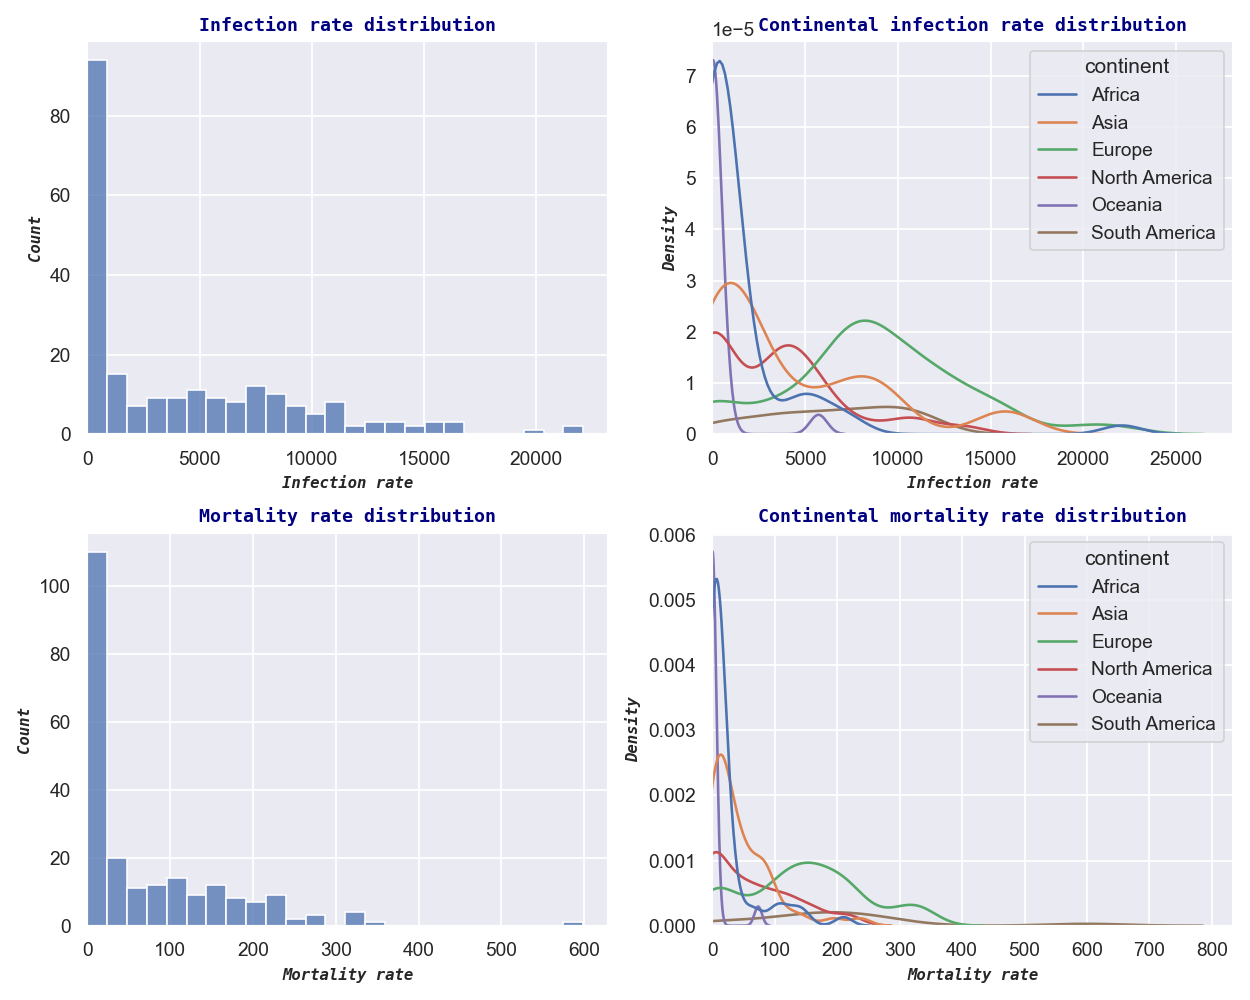

(0.0, 833.8964692583975)

In [30]:
# Distribution of infection and mortality rate

figure, axi = plt.subplots(2,2, figsize=(10, 8), tight_layout=True, sharey=False)


# chart titles font properties 
title_font = {
    'color': 'navy',
    'fontfamily': 'Monospace',
    'fontstyle': 'normal',
    'fontsize': 10.5,
    'fontweight': 'bold'
}

# chart axis label font properties 

axis_label_font = {
    'fontfamily': 'Monospace',
    'fontstyle': 'italic',
    'fontsize': 9,
    'fontweight': 'bold'
}

# charting distribution of infection rates
sns.histplot(x='infection_rate', ax=axi[0][0], bins=25, data=total_covid_data)
axi[0][0].set_xlabel('Infection rate', **axis_label_font) # setting name of  ylabel
axi[0][0].set_ylabel('Count', **axis_label_font) # setting name of  ylabel
axi[0][0].set_title('Infection rate distribution', **title_font) # setting Title
axi[0][0].set_ylim(bottom=0) # setting y-lim
axi[0][0].set_xlim(left=0) # setting y-lim

# charting distribution of continent-wise infection rates
sns.kdeplot(x='infection_rate', ax=axi[0][1], hue='continent', data=total_covid_data, bw_adjust=.7)
axi[0][1].set_xlabel('Infection rate', **axis_label_font) # setting name of  ylabel
axi[0][1].set_ylabel('Density', **axis_label_font) # setting name of  ylabel
axi[0][1].set_title('Continental infection rate distribution', **title_font) # setting Title
axi[0][1].set_ylim(bottom=0) # setting y-lim
axi[0][1].set_xlim(left=0) # setting y-lim

# charting distribution of mortality rates
sns.histplot(x='mortality_rate', ax=axi[1][0], bins=25, data=total_covid_data)
axi[1][0].set_xlabel('Mortality rate', **axis_label_font) # setting name of  ylabel
axi[1][0].set_ylabel('Count', **axis_label_font) # setting name of  ylabel
axi[1][0].set_title('Mortality rate distribution', **title_font) # setting Title
axi[1][0].set_ylim(bottom=0) # setting y-lim
axi[1][0].set_xlim(left=0) # setting y-lim

# charting distribution of continent-wise mortality rates
sns.kdeplot(x='mortality_rate', ax=axi[1][1], hue='continent', data=total_covid_data, bw_adjust=.7)
axi[1][1].set_xlabel('Mortality rate', **axis_label_font) # setting name of  ylabel
axi[1][1].set_ylabel('Density', **axis_label_font) # setting name of  ylabel
axi[1][1].set_title('Continental mortality rate distribution', **title_font) # setting Title
axi[1][1].set_ylim(bottom=0) # setting y-lim
axi[1][1].set_xlim(left=0) # setting y-lim

## What does the distribution of infection rates indicate?
### Infection Rate Distribution
The distribution of infection rates is skewed to the right, with most of the values under 17,000 infections per 100,000 residents. From the distribution we spot that there are a few values that might be considered outliers. We will investigate this further with box plots to isolate any outliers. 
For continent-wise distribution, KDE plots indicate that only Europe has a fairly normal distribution of infection rates. North America and Asia have distributions that are skewed to the right. Oceania and Africa have data that is highly skewed to the right. 


### Mortality Rate Distribution
The distribution of mortality rates is similart to that of infection rates. A majority of the values lie between 0 and 300 deaths per 100,000. We also observe that few mortality rates above 300 and one close 600 deaths per 100,000. These are likely outliers but we will verify this with the help of box plots and Tchebysheff's theorem.
Continental mortality rate distribution follows that of the infection rate. Europe still approximates a normal distribution while most other continents have mortality rate distributions skewed to the right. 

### Box Plots
We will use box plots to check for outliers i.e contries that have infection/mortality rates below expected values.


<IPython.core.display.Javascript object>


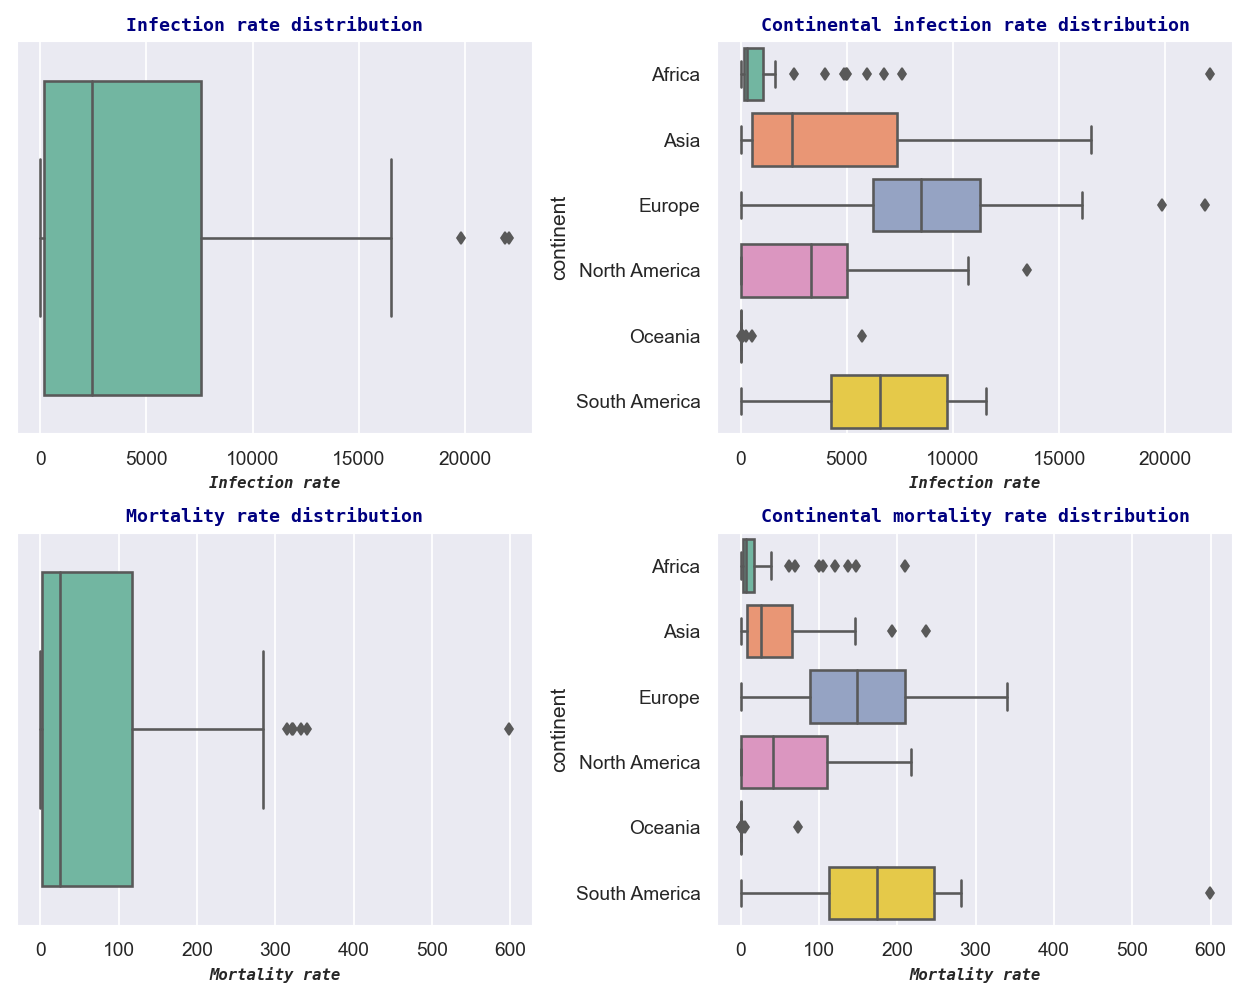

Text(0.5, 1.0, 'Continental mortality rate distribution')

In [31]:
# Distribution of infection and mortality rate

# visualizing trend of new_cases and new deaths continent-wise

figr, axel = plt.subplots(2,2, figsize=(10, 8), tight_layout=True, sharey=False)


# chart titles font properties 
title_font = {
    'color': 'navy',
    'fontfamily': 'Monospace',
    'fontstyle': 'normal',
    'fontsize': 10.5,
    'fontweight': 'bold'
}

# chart axis label font properties 

axis_label_font = {
    'fontfamily': 'Monospace',
    'fontstyle': 'italic',
    'fontsize': 9,
    'fontweight': 'bold'
}

# charting distribution of infection rates
sns.boxplot(x='infection_rate', ax=axel[0][0], orient='h', palette='Set2', data=total_covid_data)
axel[0][0].set_xlabel('Infection rate', **axis_label_font) # setting name of  ylabel
axel[0][0].set_title('Infection rate distribution', **title_font) # setting Title

# charting distribution of continent-wise infection rates
sns.boxplot(x='infection_rate', y='continent', ax=axel[0][1], orient='h', palette='Set2', data=total_covid_data)
axel[0][1].set_xlabel('Infection rate', **axis_label_font) # setting name of  ylabel
axel[0][1].set_title('Continental infection rate distribution', **title_font) # setting Title


# charting distribution of mortality rates
sns.boxplot(x='mortality_rate', ax=axel[1][0], orient='h', palette='Set2',data=total_covid_data)
axel[1][0].set_xlabel('Mortality rate', **axis_label_font) # setting name of  ylabel
axel[1][0].set_title('Mortality rate distribution', **title_font) # setting Title


# charting distribution of continent-wise mortality rates
sns.boxplot(x='mortality_rate', y='continent', orient='h', ax=axel[1][1], palette='Set2', data=total_covid_data)
axel[1][1].set_xlabel('Mortality rate', **axis_label_font) # setting name of  ylabel
axel[1][1].set_title('Continental mortality rate distribution', **title_font) # setting Title


## Outliers
#### Analysis of World-wide distribution & outliers 
Box plots that we do indeed have outliers when it comes to both infection and mortality rates. Box plots also show that our data is skewed right as indicated by histgrams. 

#### Analysis of Continental distribution & outliers
Box plots give a clear indication that data for the African and Ocenia continents are highly skewed. Analysis of distribution of infection and mortality rates in the continent of Africa reveals presence of a lot of outliers, this is a likely indication of incomplete data. 

#### Isolating countries unusually high infection and mortality rates
The objective is to identify countries with infection and martality rates outside the expected range. Because the 

## Criteria
### Tchebysheff's Theorem and Empirical Rule
To guide segmetation of infection rate and mortality rate level we will use Tchebysheff's theorem. According to the theorem, 75% to 95% of of observations should be within two standard deviations of the mean. For our analysis, we will isolate countries that are not within two standard deviations of the terming them as "high risk countries". The theorem further states that any observations beyond three standard deviations of the mean are outliers. For both infection rate and mortality rate, we will term countries outside three standard deviations of the mean as "extereme high risk countries".

### Using z-scores to isolate outliers
With z-scores we can isolate *high risk countries* and *extreme high risk* countries.

$$z\_score = \frac{x - \bar{x}}{s}$$

#### Mathematical Definition
High risk --- 2 < z-score < 3
Extemely high risk --- z-score > 3

In [32]:
# function that calculates z_score

def z_score(observation, mean, standard_deviation):
    '''
    Calculated z-score of an observation given standard deviation and the mean dataset
    '''
    return (observation-mean)/standard_deviation


In [33]:
# infection rate z-score per country
infection_rate_mean = total_covid_data['infection_rate'].mean() # mean
infection_rate_sd = total_covid_data['infection_rate'].std() # standard deviation

total_covid_data['infection_rate_z_score'] = total_covid_data['infection_rate'].apply(z_score, args=(infection_rate_mean, infection_rate_sd))

In [34]:
# infection rate z-score per country
mortality_rate_mean = total_covid_data['mortality_rate'].mean() # mean
mortality_rate_sd = total_covid_data['mortality_rate'].std() # standard deviation

total_covid_data['mortality_rate_z_score'] = total_covid_data['mortality_rate'].apply(z_score, args=(mortality_rate_mean, mortality_rate_sd))

In [35]:
# confirming addition of z-score columns

total_covid_data.head()

,continent,location,new_cases,new_deaths,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,life_expectancy,human_development_index,infection_rate,mortality_rate,infection_rate_z_score,mortality_rate_z_score
0,Africa,Algeria,205199,5870,44616626.0,29.1,6.211,3.857,13913.80,76.88,0.748,459.92,13.16,-0.770880,-0.633657
1,Africa,Angola,62789,1662,33933611.0,16.8,2.405,1.362,5819.50,61.15,0.581,185.03,4.90,-0.827019,-0.723984
2,Africa,Benin,24560,161,12451031.0,18.8,3.244,1.942,2064.24,61.77,0.545,197.25,1.29,-0.824524,-0.763461
3,Africa,Botswana,181856,2386,2397240.0,25.8,3.941,2.242,15807.40,69.59,0.735,7586.06,99.53,0.684461,0.310837
4,Africa,Burkina Faso,14686,203,21497097.0,17.6,2.409,1.358,1703.10,61.58,0.452,68.32,0.94,-0.850854,-0.767289


### Countries with high infection rates
Let's identify the high risk countries i.e those with infection rates between 2 and 3 standard deviations of the mean.

In [36]:
# countries with infection rates between two and three standard deviations from the mean.
high_risk_countries_infection = total_covid_data[(total_covid_data['infection_rate_z_score'] > 2) & (total_covid_data['infection_rate_z_score']<3)][['location', 'infection_rate']]
high_risk_countries_infection

,location,infection_rate
58,Bahrain,15788.53
64,Georgia,16527.40
70,Israel,14964.17
80,Maldives,15836.06
114,Czechia,15923.80
146,San Marino,16092.33
147,Serbia,15108.92
149,Slovenia,14792.88


### Countries with extremely high infection rates
Tchebysheff stipulates that observations that are more than three standard deviations from the mean are highly unlikely and are therefore considered outliers. This is true for both normal and skewed distributions. Therefore, we will classify any countries with infection rates that lie outside this range as ***extremely high risk countries***.

In [37]:
# countries with infection rates more than or equal to threestandard deviations from the mean.
xt_high_risk_countries_infection = total_covid_data[total_covid_data['infection_rate_z_score'] >= 3 ][['location', 'infection_rate']]
xt_high_risk_countries_infection

,location,infection_rate
43,Seychelles,22094.83
106,Andorra,19828.32
138,Montenegro,21877.36


### Countries with high death rates
A the same criteria used to identify countries with high infection rates is used here.

In [38]:
# countries with mortality rates between two and three standard deviations from the mean.
high_risk_countries_mortality = total_covid_data[(total_covid_data['mortality_rate_z_score'] > 2) & (total_covid_data['mortality_rate_z_score']<3)][['location', 'mortality_rate']]
high_risk_countries_mortality

,location,mortality_rate
110,Bosnia and Herzegovina,340.44
111,Bulgaria,322.34
114,Czechia,284.76
124,Hungary,315.04
138,Montenegro,321.63
140,North Macedonia,332.36
146,San Marino,267.57
213,Brazil,281.86


In [39]:
# countries with mortality rates between two and three standard deviations from the mean.
xt_high_risk_countries_mortality = total_covid_data[total_covid_data['mortality_rate_z_score'] >= 3][['location', 'mortality_rate']]
xt_high_risk_countries_mortality

,location,mortality_rate
220,Peru,598.86


## Influence of socio-economic factors on infection and death rate of a country
The objective is to understand the relationship between socio-economic factors and the infection and mortality rates of countries. We will use scatter plots to explore potential relationships. These are the socio-economic factors that we will consider:
1. gdp per capita
2. life expectancy
3. human development index 


<IPython.core.display.Javascript object>


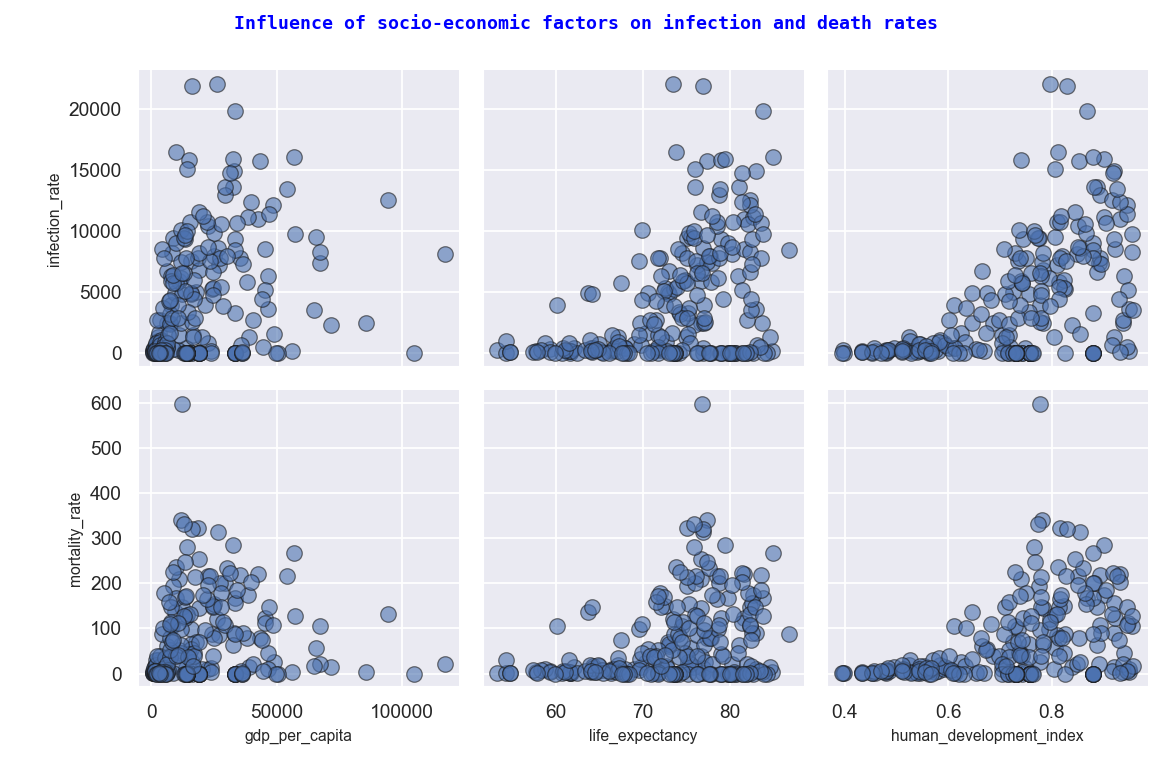

In [98]:
# pairplot showing influence of socio economic factors on infection and mortality rate

sns.pairplot(total_covid_data, x_vars=['gdp_per_capita', 'life_expectancy', 'human_development_index'], y_vars=['infection_rate', 'mortality_rate'], kind='scatter', palette='Set2', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.suptitle("Influence of socio-economic factors on infection and death rates", size=10.5, color='blue', fontfamily='monospace', fontweight='bold')
plt.tight_layout()


### How does the gdp of a country affect infection and death rates?
From the scatter plot, it appears that there is no significant relationship between the gdp_per_capita of a country and the infection and death rate of covid-19. 


### Countries with higher life expectancy have higher rates of infection
The plots suggest a positive correlation between life expectancy and the covid-19 infection rates. However, this appears to be a very weak relationship. Higher life expectancy means there is likely an aging population which might be more susciptible to the infections.

### There is a positive correclation between human development index and infection rate
Though it might be counter intuitive, the data suggests a positive relationship between human development index and the infection and death rates. The likely explanation for this is that countries with higher human development index are likely to have adequate expertise, equipment, facilities and funding to test and track covid-19 infections and deaths. 

## How does the age of a country affect infection and mortality rates?
The next goal is to explore potential relationships between age and the infection and mortality rates of countries.


<IPython.core.display.Javascript object>


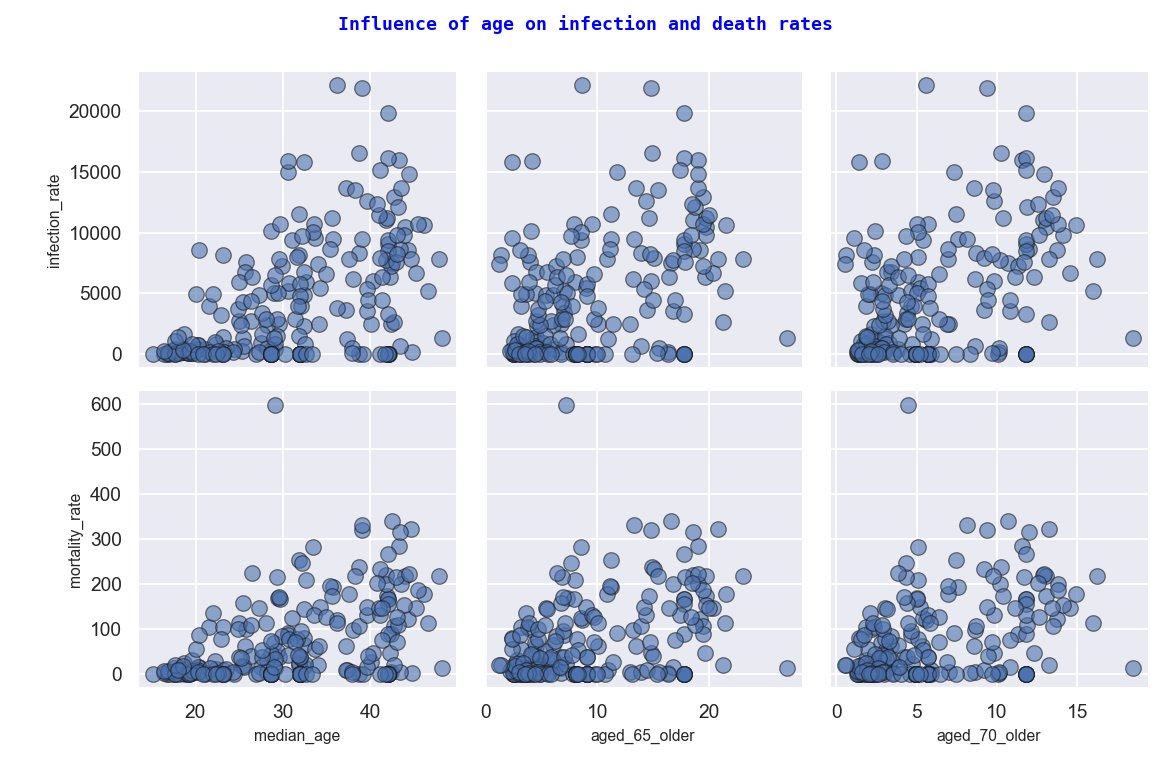

In [100]:
# pairplot showing influence of age factors on infection and mortality rate

sns.pairplot(total_covid_data, x_vars=['median_age', 'aged_65_older', 'aged_70_older'], y_vars=['infection_rate', 'mortality_rate'], kind='scatter', palette='Set2', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.suptitle("Influence of age on infection and death rates", size=10.5, color='blue', fontfamily='monospace', fontweight='bold')
plt.tight_layout()

### There is a strong correlation between the age and the infection and death rate of covid-19 in a country
From the plots we observe a strong positive correlation between the population age and the country's covid-19 death rate. This confirms our earlier hypothesis that countries with older populations (longer life expectancy) are likely to experience higher covid-19 death rates. 
Looking at scatter plots between age (median_age, aged_65_older) and infection rates, we also see a positive relationship. The older the population the higher the rate of infection. 

## Relationship between population and,  infection and mortality rates

<IPython.core.display.Javascript object>


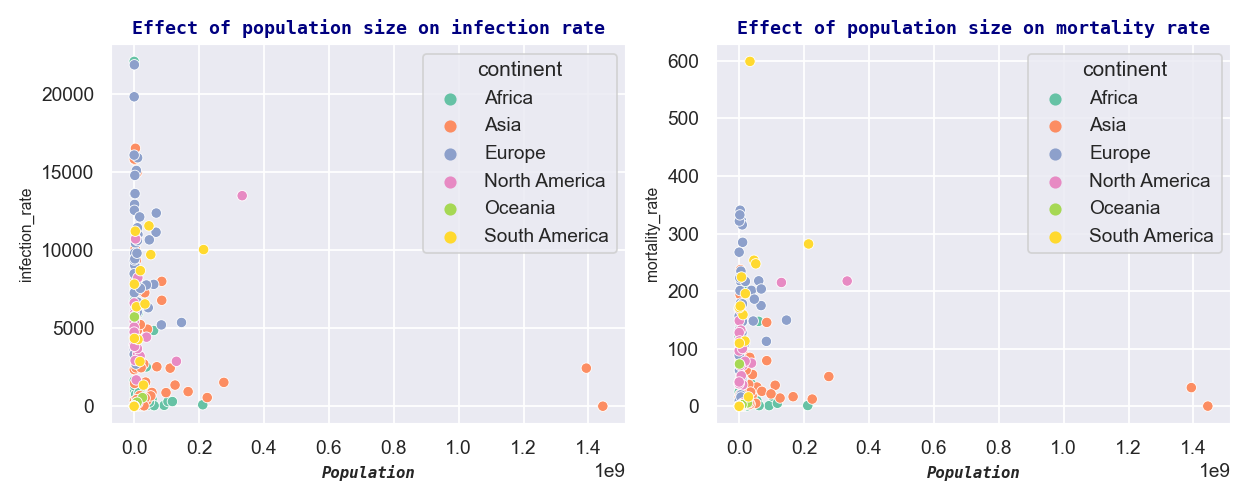

Text(0.5, 1.0, 'Effect of population size on mortality rate')

In [122]:
# visualizing trend of new_cases and new deaths continent-wise

figur, axil = plt.subplots(1,2, figsize=(10, 4), tight_layout=True, sharey=False)


# chart titles font properties 
title_font = {
    'color': 'navy',
    'fontfamily': 'Monospace',
    'fontstyle': 'normal',
    'fontsize': 10.5,
    'fontweight': 'bold'
}

# chart axis label font properties 

axis_label_font = {
    'fontfamily': 'Monospace',
    'fontstyle': 'italic',
    'fontsize': 9,
    'fontweight': 'bold'
}

# charting distribution of infection rates
sns.scatterplot(x='population', y='infection_rate', ax=axil[0], hue='continent', palette='Set2', data=total_covid_data)
axil[0].set_xlabel('Population', **axis_label_font) # setting name of  ylabel
axil[0].set_title('Effect of population size on infection rate', **title_font) # setting Title

# charting distribution of infection rates
sns.scatterplot(x='population', y='mortality_rate', ax=axil[1], hue='continent', palette='Set2', data=total_covid_data)
axil[1].set_xlabel('Population', **axis_label_font) # setting name of  ylabel
axil[1].set_title('Effect of population size on mortality rate', **title_font) # setting Title

## Population size
From the chart above, it is difficult to decern if there is indeed population size affects either the infection rate or the mortality rate of a country. To establish a relationship, it would be more appropriate to remove the two countries with extremely large populations. Let us do this and then re-examine the relationship.


In [120]:
total_covid_data_norm = total_covid_data[(total_covid_data['population'] < 400000000) & (total_covid_data['population'] > 10000000) ]

<IPython.core.display.Javascript object>


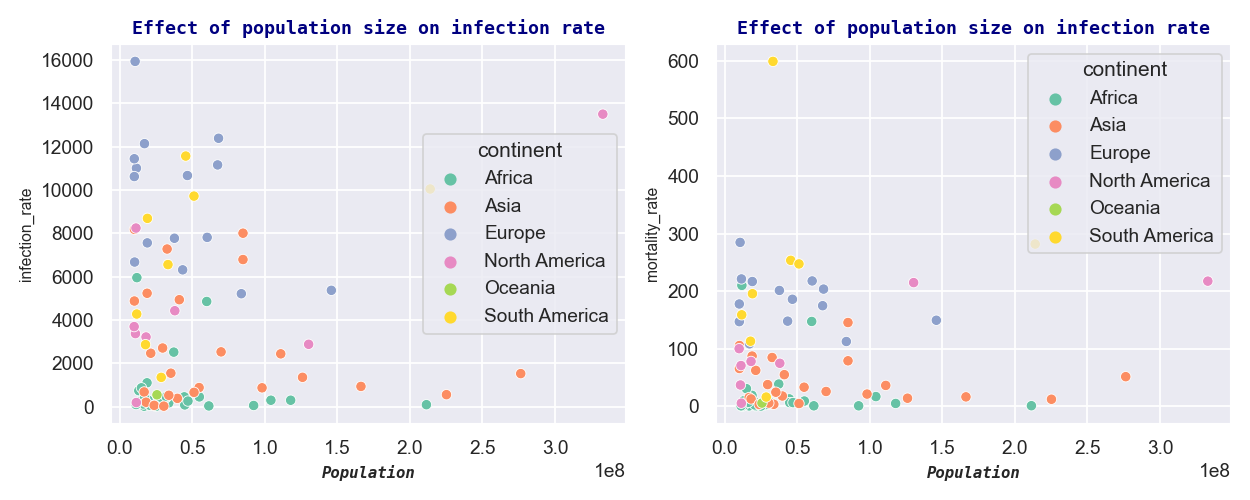

Text(0.5, 1.0, 'Effect of population size on infection rate')

In [121]:
# visualizing trend of new_cases and new deaths continent-wise

figur, axil = plt.subplots(1,2, figsize=(10, 4), tight_layout=True, sharey=False)


# chart titles font properties 
title_font = {
    'color': 'navy',
    'fontfamily': 'Monospace',
    'fontstyle': 'normal',
    'fontsize': 10.5,
    'fontweight': 'bold'
}

# chart axis label font properties 

axis_label_font = {
    'fontfamily': 'Monospace',
    'fontstyle': 'italic',
    'fontsize': 9,
    'fontweight': 'bold'
}

# charting distribution of infection rates
sns.scatterplot(x='population', y='infection_rate', ax=axil[0], hue='continent', palette='Set2', data=total_covid_data_norm)
axil[0].set_xlabel('Population', **axis_label_font) # setting name of  ylabel
axil[0].set_title('Effect of population size on infection rate', **title_font) # setting Title

# charting distribution of infection rates
sns.scatterplot(x='population', y='mortality_rate', ax=axil[1], hue='continent', palette='Set2', data=total_covid_data_norm)
axil[1].set_xlabel('Population', **axis_label_font) # setting name of  ylabel
axil[1].set_title('Effect of population size on mortality rate', **title_font) # setting Title